## Data Visualization ##

Visualize the airline data provided for the year 2018 and 2019 Q1, Q2.

In [1]:
# Include all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from collections import OrderedDict

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

Now let's check the data that we have, we see that Airports.csv file has City and State information for all the Airports.

In [2]:
airports = pd.read_csv('Airports.csv')
airports.head()

,Airport,City_State,State
0,ABE,"Allentown/Bethlehem/Easton, PA",PA
1,ABI,"Abilene, TX",TX
2,ABQ,"Albuquerque, NM",NM
3,ABR,"Aberdeen, SD",SD
4,ABY,"Albany, GA",GA


Airfares.csv has all the fare related information for all the flights.

In [3]:
airfares = pd.read_csv('Airfares.csv')
airfares.head()

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2018,1,ABE,PA,ATL,GA,692,286.40,DL,0.9455,287.18,AA,0.0339,263.31
1,2018,1,ABE,PA,BNA,TN,685,234.59,AA,0.5686,227.73,AA,0.5686,227.73
2,2018,1,ABE,PA,CLT,NC,481,289.19,AA,0.9518,288.46,AA,0.9518,288.46
3,2018,1,ABE,PA,DEN,CO,1539,263.12,UA,0.4737,255.18,UA,0.4737,255.18
4,2018,1,ABE,PA,DFW,TX,1307,261.68,AA,0.6448,260.94,UA,0.1081,200.66


Routes.csv has information about all the flight routes, such as ORIGIN city, state of the flight to the DEST city, state of the flight including the distance of the route.

In [4]:
routes = pd.read_csv('Routes.csv')
routes.head()

,Route,ORIGIN,ORIGIN_City_State,Origin_City,Origin_State,DEST,Dest_City_State,Dest_City,Dest_State,DISTANCE
0,1,ABE,"Allentown/Bethlehem/Easton, PA",Allentown/Bethlehem/Easton,PA,ATL,"Atlanta, GA",Atlanta,GA,692
1,2,ABE,"Allentown/Bethlehem/Easton, PA",Allentown/Bethlehem/Easton,PA,BNA,"Nashville, TN",Nashville,TN,685
2,3,ABE,"Allentown/Bethlehem/Easton, PA",Allentown/Bethlehem/Easton,PA,CLT,"Charlotte, NC",Charlotte,NC,481
3,4,ABE,"Allentown/Bethlehem/Easton, PA",Allentown/Bethlehem/Easton,PA,DTW,"Detroit, MI",Detroit,MI,425
4,5,ABE,"Allentown/Bethlehem/Easton, PA",Allentown/Bethlehem/Easton,PA,FLL,"Fort Lauderdale, FL",Fort Lauderdale,FL,1041


FlightDelays.csv has all the flight delays observed in the six Quarters of data provided (2018 Q1-Q4, 2019 Q1, Q2)

In [5]:
flight_delays = pd.read_csv('FlightDelays.csv', low_memory=False)
flight_delays.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25


In [6]:
flight_delays.shape

(10915495, 50)

We can see that there are more than 10 million flight delays in 1 1/2 years!!!

We grabbed some additional data which includes latitude and longitude information for the City/State for visualization purposes on the world map. 

In [7]:
columns = ['index',
           'Name',
           'city',
           'country',
           'Airport',
           'Code',
           'Latitude',
           'Longitude',
           'Altitude',
           'TimeZone',
           'DST',
           'TZ',
           'Type',
           'Source']

airports_data = pd.read_csv('airports.dat.txt',
                            header = None,
                            names = columns)

Let's view this data now.

In [8]:
print(airports_data.head())

   index                                         Name          city  \
0      1                               Goroka Airport        Goroka   
1      2                               Madang Airport        Madang   
2      3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3      4                               Nadzab Airport        Nadzab   
4      5  Port Moresby Jacksons International Airport  Port Moresby   

            country Airport  Code  Latitude   Longitude  Altitude TimeZone  \
0  Papua New Guinea     GKA  AYGA -6.081690  145.391998      5282       10   
1  Papua New Guinea     MAG  AYMD -5.207080  145.789001        20       10   
2  Papua New Guinea     HGU  AYMH -5.826790  144.296005      5388       10   
3  Papua New Guinea     LAE  AYNZ -6.569803  146.725977       239       10   
4  Papua New Guinea     POM  AYPY -9.443380  147.220001       146       10   

  DST                    TZ     Type       Source  
0   U  Pacific/Port_Moresby  airport  OurAirports  


Merge this additional data we have got with the one obtained from Airports.csv on the Airport code.

In [9]:
airports = pd.merge(airports, airports_data, on = ['Airport'], how = 'inner')

Now we move onto the visualizations:
Here we try to visualization the number of flight delays on the world map i.e., to identify which particular cities/states have high airline delays.

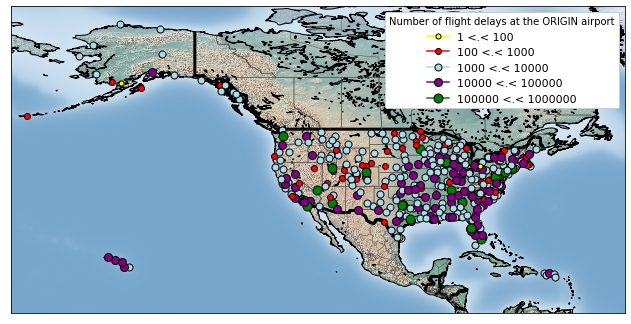

In [10]:
count_flights = flight_delays['ORIGIN'].value_counts()
plt.figure(figsize=(11, 11))

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []

for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y, x) in airports[['Airport', 'Latitude', 'Longitude']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()

for key in key_order:
    new_label[key] = by_label[key]

plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flight delays at the ORIGIN airport', frameon = True, framealpha = 1)
plt.show()

The below plot shows the number of flight delays per each quarter.

In [11]:
delay_counts = flight_delays.groupby(['YEAR', 'QUARTER']).size().reset_index().rename(columns={0: 'count'})
delay_counts['YEAR_QUARTER'] = delay_counts[['YEAR', 'QUARTER']].astype(str).apply(lambda x: 'Q'.join(x), axis = 1)

trace = go.Bar(
    x = delay_counts.YEAR_QUARTER,
    y = delay_counts['count']
)

data = [trace]
layout = go.Layout(
    title = 'Flight Delay counts per quarter', 
    yaxis = dict(title = '# of Flight Delays')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

So, we see a similar trend every quarter i.e., every quarter has atleast 1.5 million flight delays. Another observation is that the number of flight delays tend to peak during Quarter 2 and 3, and then they decrease again. Now, lets see the trends based on the Month.

In [12]:
fdc = flight_delays.copy()

month = {1: 'Jan',
         2: 'Feb',
         3: 'Mar',
         4: 'Apr',
         5: 'May',
         6: 'Jun',
         7: 'Jul',
         8: 'Aug',
         9: 'Sep',
         10: 'Oct',
         11: 'Nov',
         12: 'Dec'}

fdc['dep_delay'] = np.where(fdc.DEP_DELAY > 0, 1, 0)
fdc['arr_delay'] = np.where(fdc.ARR_DELAY > 0, 1, 0)
fdc_m = fdc.groupby('MONTH').dep_delay.mean().round(2)

fdc_m.index = fdc_m.index.map(month)
trace1 = go.Bar(
    x = fdc_m.index,
    y = fdc_m.values,
    name = 'Departure_delay',
    marker = dict(
        color = 'aqua'
    )
)

fdc_m = fdc.groupby('MONTH').arr_delay.mean().round(2)
fdc_m.index = fdc_m.index.map(month)

trace2 = go.Bar(
    x = fdc_m.index,
    y = fdc_m.values,
    name='Arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Again, we see that each month has atleast 0.3% of flights delayed. And the number of flight delays peak in the months of June and July, probably due to the increased number of total flights during these months. Now, we shift our focus to the trends corresponding to each day of the week.

In [13]:
dayOfWeek = {1:'Monday',
             2:'Tuesday',
             3:'Wednesday',
             4:'Thursday',
             5:'Friday', 
             6:'Saturday',
             7:'Sunday'}

fdc_w = fdc.groupby('DAY_OF_WEEK').dep_delay.mean().round(2)
fdc_w.index = fdc_w.index.map(dayOfWeek)

trace1 = go.Bar(
    x = fdc_w.index,
    y = fdc_w.values,
    name = 'Departure_delay',
    marker=dict(
        color = 'cyan'
    )
)

fdc_w = fdc.groupby('DAY_OF_WEEK').arr_delay.mean().round(2)
fdc_w.index = fdc_w.index.map(dayOfWeek)

trace2 = go.Bar(
    x = fdc_w.index,
    y = fdc_w.values,
    name='Arrival_delay',
    marker=dict(
        color = 'indigo'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='% Delay (Day of Week)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Surprisingly, number of flight delays on weekdays (Thursday and Friday) are more than on the weekend (Saturday and Sunday)

Lets see the Airline names. We have 17 unique airline names.

In [14]:
airline_names = flight_delays.CARRIER.unique() 
airline_names

array(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK',
       'OH', 'OO', 'UA', 'WN', 'YV', 'YX'], dtype=object)

Lets visualize Arrival delays for each airline.

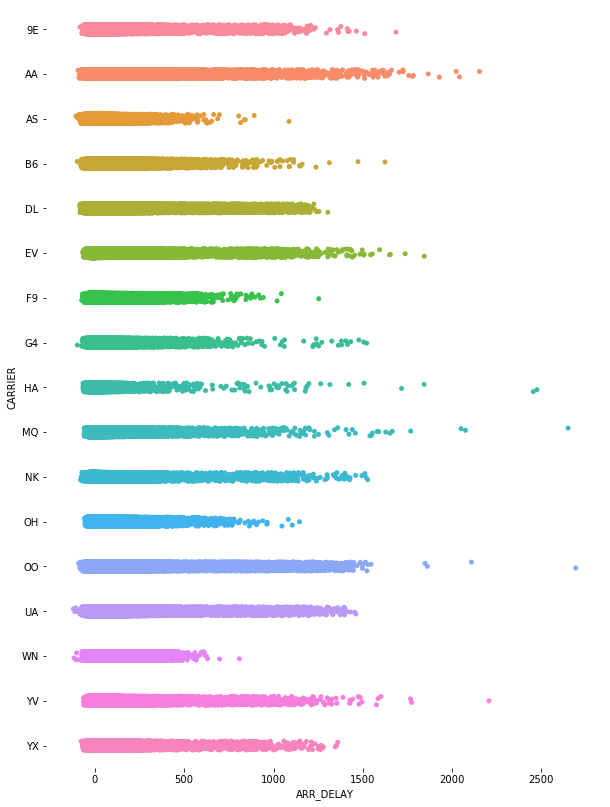

In [15]:
import seaborn as sns

axis = plt.subplots(figsize=(10, 14))
sns.despine(bottom=True, left=True)

# Observations with Scatter Plot
sns.stripplot(x = "ARR_DELAY",
              y = "CARRIER",
              data = flight_delays,
              dodge=True,
              jitter=True)

plt.show()

We can see that the AA (American Airlines) has huge delays. From the above stripplot and below pie chart, American Airlines has the high share in flight delays and also the delays in quite longer, where as even though 9E has the highest share in the number of flight delays (19%), the delay durations are actually lesser than that of AA. 

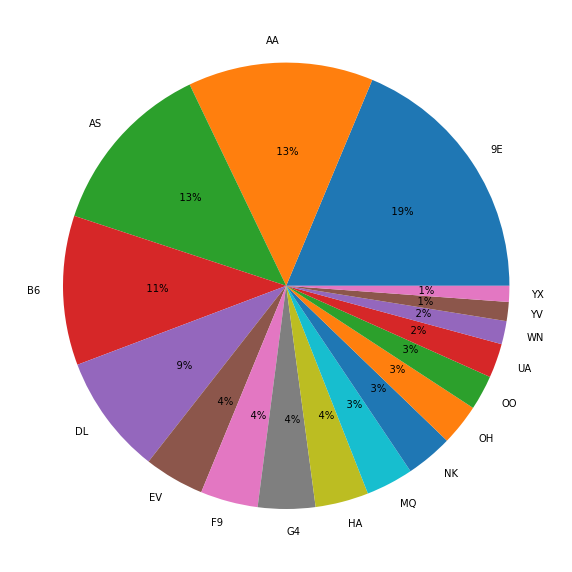

In [16]:
axis = plt.subplots(figsize=(10, 14))

Name = flight_delays["CARRIER"].unique()
size = flight_delays["CARRIER"].value_counts()

plt.pie(size, labels=Name, autopct='%5.0f%%')
plt.show()

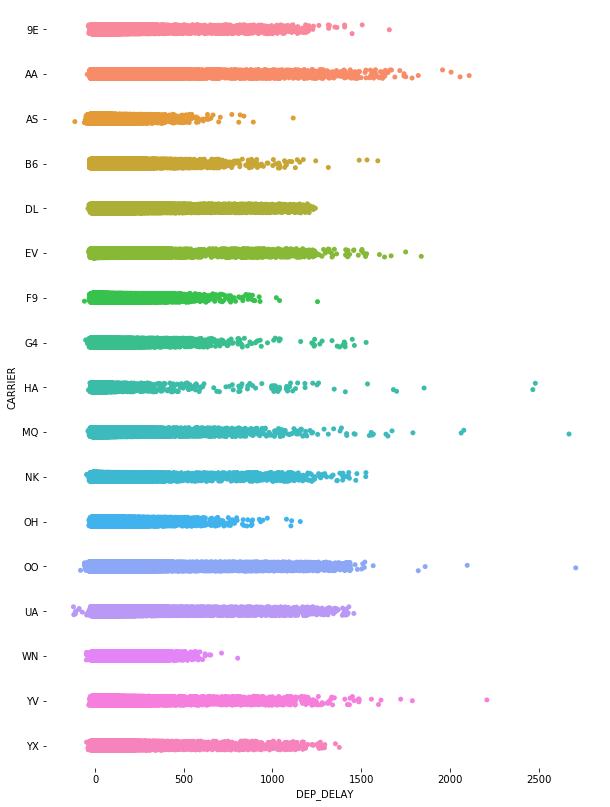

In [17]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)

# Observations with Scatter Plot
sns.stripplot(x = "DEP_DELAY",
              y = "CARRIER",
              data = flight_delays,
              dodge=True,
              jitter=True)

plt.show()

We observe that the stripplots for the Arrival delay and Departure delays look almost the same, this is because they are correlated i.e., dependent on each other. Intuitively, if a flight departure is delayed, then the flight arrival at the destination location will also be delayed. Since, we are deriving the information for each carrier, both the plots look the same. The same logic can be used during data cleaning to include only one of Arrival or departure delays.

Next, we further breakdown the delays into short, small and longer delays. Short delays are the ones which are less than 5 min. Small delays are the ones for which delays range from 5 min to 45 min. Longer delays contains the ones for which delays are more than 45 min.

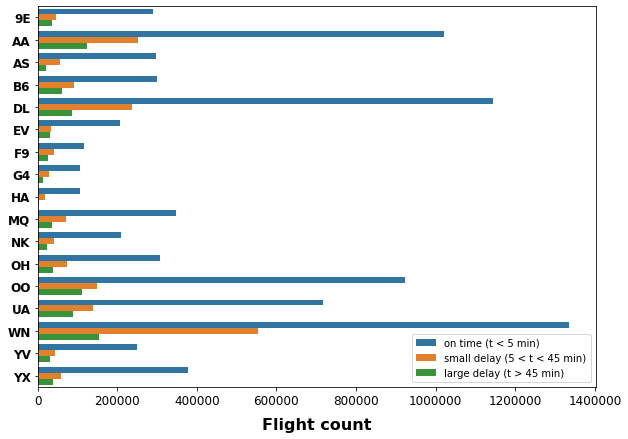

In [18]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flight_delays['DELAY_LEVEL'] = flight_delays['DEP_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10, 7))
ax = sns.countplot(y="CARRIER", hue='DELAY_LEVEL', data=flight_delays)

labels = airline_names

ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

Like we inferred from the previous plots, AA and WN have the huge delays i.e., longer delays for flights.

Next plot shows the mean Arrival and Departure delays for the airlines.

In [19]:
fdc_d = fdc.groupby('CARRIER').DEP_DELAY.mean().to_frame().sort_values(by='DEP_DELAY',
                                                    ascending=False).round(2)
trace1 = go.Bar(
    x=fdc_d.index,
    y=fdc_d.DEP_DELAY,
    name='departure_delay',
    marker=dict(
        color = 'navy'
    )
)

fdc_a = fdc.groupby('CARRIER').ARR_DELAY.mean().to_frame().sort_values(by='ARR_DELAY',
                                                    ascending=False).round(2)
trace2 = go.Bar(
    x=fdc_a.index,
    y=fdc_a.ARR_DELAY,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
    yaxis = dict(title = 'minute'), 
                   barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
def get_stats(group):
    return {'mean': group.mean(), 'std': group.std(),
            'hit_r': group.apply(lambda x: x >= 0).sum() / float(group.count()),
             'count':group.count() }

In [21]:
airport_mean_delays = pd.DataFrame(pd.Series(flight_delays['ORIGIN'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in airline_names:
    df1 = flight_delays[flight_delays['CARRIER'] == carrier]
    test = df1['DEP_DELAY_NEW'].groupby(flight_delays['ORIGIN']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

c:\users\dsand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in true_divide



Finally, below we show the impact of origin of the airport in the delays.

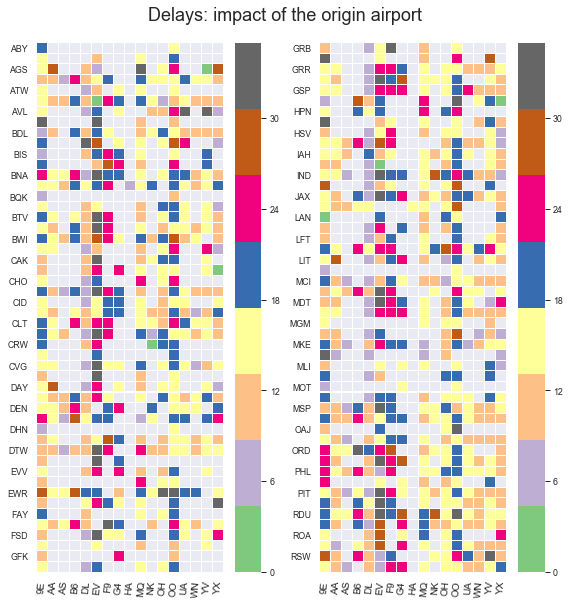

In [22]:
sns.set(context = "paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:]

mask = subset.isnull()
sns.heatmap(subset, linewidths = 0.01, cmap = "Accent", mask = mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1, 2, 2)    
subset = airport_mean_delays.iloc[50:100,:]
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths = 0.01, cmap = "Accent", mask = mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()